In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Mapeamento dos domínios

In [2]:
df = pd.read_csv('Data/processed_df.csv')

In [3]:
ci_map = {
    'cognitive': ['semantic_memory', 'verbal_fluency', 'memory_recall', 'temporal_orientation'],
    'psychologicao': ['depression_scale', 'sleep_quality'],
    'locomotor': ['gait_speed', 'balance'],
    'vitality': ['handgrip', 'poor_endurance', 'weight_loss', 'exaustion'],
    'sensory': ['distance_vision', 'near_vision', 'hearing_deficit']
}

# ci_map = {
#     'cognitive': ['semantic_memory', 'verbal_fluency', 'memory_recall'],
#     'psychologicao': ['depression_scale', 'sleep_quality'],
#     'locomotor': ['gait_speed', 'balance'],
#     'vitality': ['handgrip', 'poor_endurance', 'weight_loss', 'exaustion'],
#     'sensory': ['distance_vision', 'near_vision', 'hearing_deficit']
# }
ci_cols = []
[ci_cols.extend(value) for value in ci_map.values()]

ci_cols

['semantic_memory',
 'verbal_fluency',
 'memory_recall',
 'temporal_orientation',
 'depression_scale',
 'sleep_quality',
 'gait_speed',
 'balance',
 'handgrip',
 'poor_endurance',
 'weight_loss',
 'exaustion',
 'distance_vision',
 'near_vision',
 'hearing_deficit']

### Limpando

In [4]:
df[ci_cols].isna().sum()

semantic_memory          581
verbal_fluency           343
memory_recall            328
temporal_orientation     328
depression_scale        1109
sleep_quality             27
gait_speed               572
balance                  975
handgrip                 539
poor_endurance           166
weight_loss              328
exaustion                168
distance_vision           25
near_vision               19
hearing_deficit           13
dtype: int64

In [5]:
df_clean = df.dropna(subset=ci_cols)

In [6]:
df_clean.isna().sum()

handgrip               0
weight_loss            0
exaustion              0
poor_endurance         0
gait_speed             0
                    ... 
idade_morador_13    6954
idade_morador_14    6954
adl_index              6
aadl_index            32
iadl_index            39
Length: 63, dtype: int64

- IC muda para os sexos
- IC muda para região do Brasil
- IC muda para etnias 
- IC muda para homens que moram com mulheres
- Variável de suporte das atividades (pergunta do telefone)


- ADL 
- IADL
- AADL

#### Normalizando

In [7]:
df_pca = df_clean[ci_cols]

# Initialize MinMaxScaler
scaler = StandardScaler()

# Fit and transform the data
df_scaled = scaler.fit_transform(df_pca)
df_scaled = pd.DataFrame(df_scaled, columns=df_pca.columns)
df_scaled

,semantic_memory,verbal_fluency,memory_recall,temporal_orientation,depression_scale,sleep_quality,gait_speed,balance,handgrip,poor_endurance,weight_loss,exaustion,distance_vision,near_vision,hearing_deficit
0,3.0,15.0,6.0,4.0,2.0,3.0,3.500,4.0,24.333333,1.0,0.0,1.0,2.0,2.0,2.0
1,3.0,8.0,2.0,4.0,2.0,2.0,3.300,4.0,25.666667,1.0,0.0,1.0,3.0,3.0,4.0
3,1.0,10.0,4.0,4.0,3.0,3.0,5.610,4.0,24.000000,1.0,0.0,1.0,2.0,2.0,3.0
5,3.0,8.0,3.0,4.0,5.0,5.0,6.815,2.0,15.666667,2.0,0.0,3.0,4.0,3.0,2.0
7,2.0,14.0,3.0,3.0,3.0,7.0,3.460,2.0,27.333333,1.0,0.0,1.0,1.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9403,3.0,16.0,4.0,4.0,6.0,9.0,3.275,3.0,24.666667,1.0,0.0,3.0,2.0,2.0,1.0
9404,4.0,18.0,6.0,4.0,4.0,4.0,3.305,3.0,22.666667,1.0,0.0,1.0,3.0,3.0,3.0
9405,3.0,13.0,5.0,4.0,3.0,2.0,3.890,4.0,19.666667,1.0,0.0,1.0,3.0,2.0,2.0
9407,4.0,16.0,7.0,4.0,1.0,3.0,4.265,3.0,22.666667,3.0,0.0,2.0,2.0,2.0,2.0


#### Observando correlações

#### Aplicando o PCA

- Para toda a capacidade intrinseca

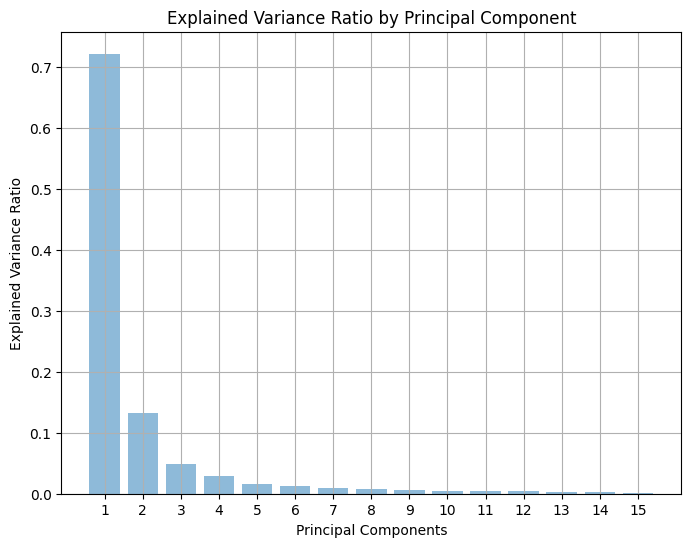

In [8]:
from sklearn.decomposition import PCA

# Initialize PCA with desired number of components
pca = PCA()  # We'll reduce the data to 2 dimensions

# Fit PCA to the data and transform the data
transformed_data = pca.fit_transform(df_scaled)

explained_variance_ratio = pca.explained_variance_ratio_

# Plot explained variance ratio
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(True)
plt.show()

In [9]:
explained_variance_ratio.cumsum()

array([0.72117087, 0.85317496, 0.90165541, 0.9302908 , 0.94584836,
       0.95929118, 0.96806248, 0.97526788, 0.98076209, 0.98474165,
       0.98858612, 0.99223054, 0.99574026, 0.99904238, 1.        ])

In [10]:
weights_pc1 = pca.components_[0]

In [11]:
weights_pc1

array([ 0.02080205,  0.11475751,  0.02999878,  0.00844132, -0.03452668,
       -0.02871897, -0.05629884,  0.00958639,  0.98966542, -0.00906986,
       -0.00356089, -0.01479688, -0.01804164, -0.00586162, -0.00608905])

In [12]:
for i, c in enumerate(ci_cols):
    print('='*40)
    print('variável: ' + c)
    print('peso: ' + str(weights_pc1[i]))
    print('='*40)



variável: semantic_memory
peso: 0.020802047703126915
variável: verbal_fluency
peso: 0.11475750801293483
variável: memory_recall
peso: 0.029998777823327022
variável: temporal_orientation
peso: 0.008441318306566366
variável: depression_scale
peso: -0.034526676743923075
variável: sleep_quality
peso: -0.028718967740871654
variável: gait_speed
peso: -0.05629883668295776
variável: balance
peso: 0.009586391554298692
variável: handgrip
peso: 0.9896654243813281
variável: poor_endurance
peso: -0.009069855411189563
variável: weight_loss
peso: -0.0035608909725196526
variável: exaustion
peso: -0.01479688065320435
variável: distance_vision
peso: -0.018041643192320926
variável: near_vision
peso: -0.00586162418277497
variável: hearing_deficit
peso: -0.00608905317992945


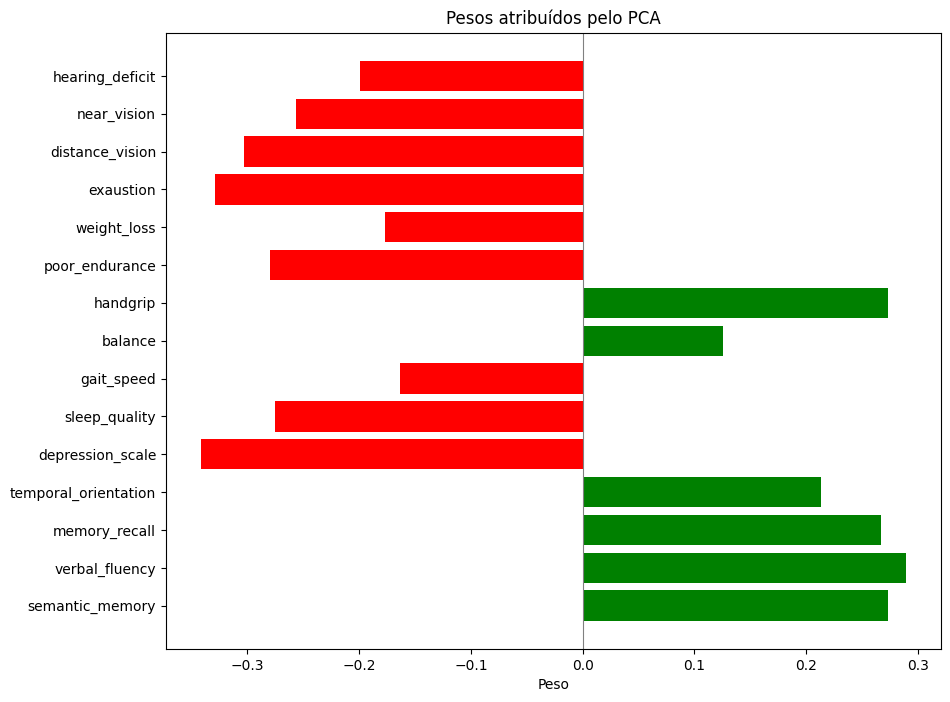

In [34]:

# Data for the variables and their weights
variables = ci_cols
weights = -1*weights_pc1

# Creating the plot
fig, ax = plt.subplots(figsize=(10, 8))
bars = ax.barh(variables, weights, color=['red' if w < 0 else 'green' for w in weights])

# Adding labels and title
ax.set_xlabel('Peso')
ax.set_title('Pesos atribuídos pelo PCA')
plt.axvline(0, color='grey', linewidth=0.8)

# Showing the plot
plt.show()

### Aplicando o AUTOENCONDER

In [42]:
# Define dataset

df_autoencoder = df_clean[ci_cols]

In [43]:
df_autoencoder.dtypes

semantic_memory         float64
verbal_fluency          float64
memory_recall           float64
temporal_orientation    float64
depression_scale        float64
sleep_quality           float64
gait_speed              float64
balance                 float64
handgrip                float64
poor_endurance          float64
weight_loss             float64
exaustion               float64
distance_vision         float64
near_vision             float64
hearing_deficit         float64
dtype: object

In [44]:
df_autoencoder

,semantic_memory,verbal_fluency,memory_recall,temporal_orientation,depression_scale,sleep_quality,gait_speed,balance,handgrip,poor_endurance,weight_loss,exaustion,distance_vision,near_vision,hearing_deficit
0,3.0,15.0,6.0,4.0,2.0,3.0,3.500,4.0,24.333333,1.0,0.0,1.0,2.0,2.0,2.0
1,3.0,8.0,2.0,4.0,2.0,2.0,3.300,4.0,25.666667,1.0,0.0,1.0,3.0,3.0,4.0
3,1.0,10.0,4.0,4.0,3.0,3.0,5.610,4.0,24.000000,1.0,0.0,1.0,2.0,2.0,3.0
5,3.0,8.0,3.0,4.0,5.0,5.0,6.815,2.0,15.666667,2.0,0.0,3.0,4.0,3.0,2.0
7,2.0,14.0,3.0,3.0,3.0,7.0,3.460,2.0,27.333333,1.0,0.0,1.0,1.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9403,3.0,16.0,4.0,4.0,6.0,9.0,3.275,3.0,24.666667,1.0,0.0,3.0,2.0,2.0,1.0
9404,4.0,18.0,6.0,4.0,4.0,4.0,3.305,3.0,22.666667,1.0,0.0,1.0,3.0,3.0,3.0
9405,3.0,13.0,5.0,4.0,3.0,2.0,3.890,4.0,19.666667,1.0,0.0,1.0,3.0,2.0,2.0
9407,4.0,16.0,7.0,4.0,1.0,3.0,4.265,3.0,22.666667,3.0,0.0,2.0,2.0,2.0,2.0


In [46]:


# Split the data into training and testing sets
X_train, X_test = train_test_split(df_autoencoder, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [62]:
X_train.shape

(5564, 15)

In [63]:
def build_autoencoder(input_shape, architecture, output='decoder'):
    input_layer = Input(shape=input_shape, name='input')
    encoder_layer = input_layer
    arch_size = len(architecture)
    # Encoder layers
    for neurons in architecture[:arch_size//2]:
        encoder_layer = Dense(neurons, activation='relu')(encoder_layer)

    # Bottleneck layer
    encoder_output = Dense(architecture[arch_size//2], activation='linear', name="bottleneck")(encoder_layer)

    decoder_layer = encoder_output

    # Decoder layers
    for neurons in architecture[arch_size//2 + 1:]:
        decoder_layer = Dense(neurons, activation='relu')(decoder_layer)

    output_layer = Dense(input_shape[0], activation='relu')(decoder_layer)

    # Define autoencoder model
    if output ==  'decoder':
        autoencoder = Model(input_layer, output_layer)
    elif output ==  'encoder':
        autoencoder = Model(input_layer, encoder_output)
    # Compile the model
    autoencoder.compile(optimizer=Adam(), loss='mean_squared_error')

    return autoencoder

In [64]:
from sklearn.metrics import r2_score
def train_autoencoder(X_train_scaled, architecture):
    input_shape = X_train_scaled.shape[1:]
    autoencoder = build_autoencoder(input_shape, architecture)
    print(autoencoder.summary())
    autoencoder.fit(X_train_scaled, X_train_scaled, batch_size=32, epochs=50, verbose=1)

    decoded_data = autoencoder.predict(X_train_scaled)
    r2_scores = []
    for i in range(15):
        r2 = r2_score(X_train_scaled[:, i], decoded_data[:, i])  # Compare each output variable to its corresponding input variable
        r2_scores.append(r2)
    global_r2 = r2_score(X_train_scaled, decoded_data)
    return r2_scores, global_r2, autoencoder


In [65]:
architectures = [
  (3, 2, 3), (6, 3, 2, 3, 6), (8, 4, 2, 4, 8), (16, 8, 4, 2, 4, 8),  (32, 16, 8, 4, 2, 4, 8) 
]  # Example architectures


train_r2_scores = []

for architecture in architectures:
    train_r2 = train_autoencoder(X_train_scaled, architecture)
    train_r2_scores.append(train_r2)




Model: "functional_43"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 15)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_112 (Dense)               │ (None, 3)              │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bottleneck (Dense)              │ (None, 2)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_113 (Dense)               │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_114 (Dense)               │ (None, 15)             │            60 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 125 (500.00 B)

 Trainable params: 125 (500.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.9663
Epoch 2/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9535
Epoch 3/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9216
Epoch 4/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.9181
Epoch 5/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.9314
Epoch 6/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.8806
Epoch 7/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.8885
Epoch 8/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.8705
Epoch 9/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8738
Epoch 10/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8645
Epoch 11/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8426
Epoch 12/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8696
Epoch 13/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8455
Epoch 14/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8363
Epoch 15/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

Model: "functional_45"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 15)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_115 (Dense)               │ (None, 6)              │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_116 (Dense)               │ (None, 3)              │            21 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bottleneck (Dense)              │ (None, 2)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_117 (Dense)               │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_118 (Dense)               │ (None, 6)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_119 (Dense)               │ (None, 15)             │           105 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 263 (1.03 KB)

 Trainable params: 263 (1.03 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.9943
Epoch 2/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.9686
Epoch 3/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.9505
Epoch 4/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9337
Epoch 5/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9195
Epoch 6/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.8897
Epoch 7/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8979
Epoch 8/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9044
Epoch 9/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8972
Epoch 10/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8797
Epoch 11/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8608
Epoch 12/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8822
Epoch 13/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8850
Epoch 14/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8667
Epoch 15/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

Model: "functional_47"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 15)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_120 (Dense)               │ (None, 8)              │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_121 (Dense)               │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bottleneck (Dense)              │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_122 (Dense)               │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_123 (Dense)               │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_124 (Dense)               │ (None, 15)             │           135 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 361 (1.41 KB)

 Trainable params: 361 (1.41 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.9903
Epoch 2/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9299
Epoch 3/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8753
Epoch 4/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9100
Epoch 5/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8677
Epoch 6/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8574
Epoch 7/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8598
Epoch 8/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8386
Epoch 9/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8329
Epoch 10/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8307
Epoch 11/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8225
Epoch 12/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8203
Epoch 13/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8290
Epoch 14/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8173
Epoch 15/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Model: "functional_49"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 15)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_125 (Dense)               │ (None, 16)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_126 (Dense)               │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_127 (Dense)               │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bottleneck (Dense)              │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_128 (Dense)               │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_129 (Dense)               │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_130 (Dense)               │ (None, 15)             │           135 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 625 (2.44 KB)

 Trainable params: 625 (2.44 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.9891
Epoch 2/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.9507
Epoch 3/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8946
Epoch 4/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9044
Epoch 5/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9121
Epoch 6/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8791
Epoch 7/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8783
Epoch 8/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9057
Epoch 9/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8923
Epoch 10/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8925
Epoch 11/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8916
Epoch 12/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8890
Epoch 13/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9238
Epoch 14/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9057
Epoch 15/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

Model: "functional_51"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 15)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_131 (Dense)               │ (None, 32)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_132 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_133 (Dense)               │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bottleneck (Dense)              │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_134 (Dense)               │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_135 (Dense)               │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_136 (Dense)               │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_137 (Dense)               │ (None, 15)             │           135 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,409 (5.50 KB)

 Trainable params: 1,409 (5.50 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.9398
Epoch 2/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9063
Epoch 3/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8653
Epoch 4/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.8735
Epoch 5/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.8327
Epoch 6/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.8309
Epoch 7/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.8121
Epoch 8/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7929
Epoch 9/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7716
Epoch 10/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7825
Epoch 11/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7817
Epoch 12/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.7670
Epoch 13/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.7852
Epoch 14/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.7759
Epoch 15/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

In [67]:
print("Training R2 Scores:")
for i, architecture in enumerate(architectures):
    print('='*40)
    print(f"Architecture {architecture}:")
    print(f'global: ', train_r2_scores[i][1])
    print('='*40)
    
    for j, feat in enumerate(df_autoencoder.columns):
        print(feat, train_r2_scores[i][0][j])
    print('='*40)

Training R2 Scores:
Architecture (3, 2, 3):
global:  0.18592224593966042
semantic_memory 0.0
verbal_fluency 0.3387000257438224
memory_recall 0.21269755732954887
temporal_orientation 0.0
depression_scale 0.2071782551012793
sleep_quality 0.45676111364420047
gait_speed 0.0
balance 0.01506092059621289
handgrip 0.13709815666928815
poor_endurance 0.21387966928501922
weight_loss 0.8131975679723401
exaustion 0.0
distance_vision 0.22228697248256046
near_vision 0.17197345027065836
hearing_deficit 0.0
Architecture (6, 3, 2, 3, 6):
global:  0.21685583865115987
semantic_memory 0.2602540268202642
verbal_fluency 0.35237647827939855
memory_recall 0.0
temporal_orientation 0.04974927352480951
depression_scale 0.28000481139126154
sleep_quality 0.4104004657344683
gait_speed 0.6371201572595939
balance 0.01660560667414157
handgrip 0.4090639152450647
poor_endurance 1.1102230246251565e-16
weight_loss 0.8094702234504687
exaustion 0.0
distance_vision 0.0
near_vision 0.0
hearing_deficit 0.02779262138791805
Archi

(0.0, 0.3)

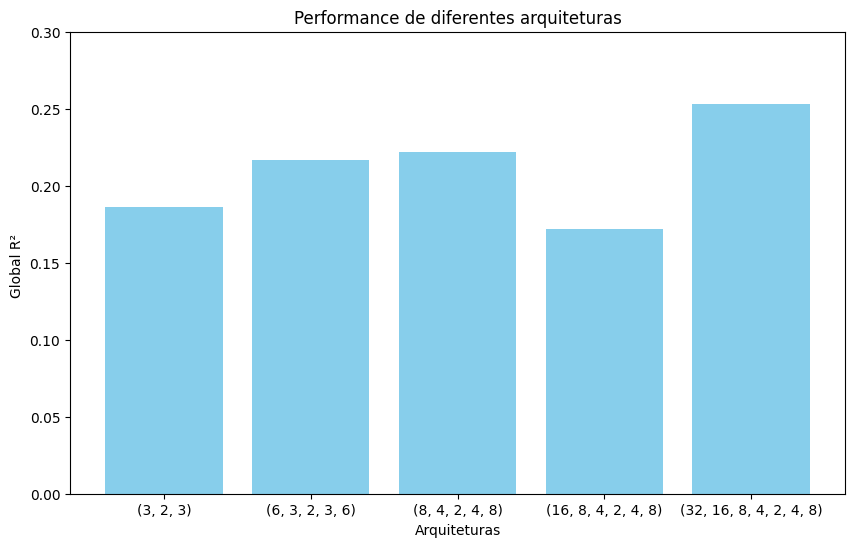

In [69]:
import matplotlib.pyplot as plt

# Arquiteturas e seus respectivos scores globais
architectures = ["(3, 2, 3)", "(6, 3, 2, 3, 6)", "(8, 4, 2, 4, 8)", "(16, 8, 4, 2, 4, 8)", "(32, 16, 8, 4, 2, 4, 8)"]
global_scores = [0.18592224593966042, 0.21685583865115987, 0.221624769800246, 0.1715787550796469, 0.25330258834590963]

# Criando o gráfico
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(architectures, global_scores, color='skyblue')

# Adicionando labels e título
ax.set_ylabel('Global R² ')
ax.set_xlabel('Arquiteturas')
ax.set_title('Performance de diferentes arquiteturas')
ax.set_ylim([0, 0.3])

# Mostrando o 

In [ ]:
autoencoder = build_autoencoder((13,), (10, 5, 2, 5, 10), output='encoder')

encoded_data = autoencoder.predict(df_autoencoder)
encoded_df = pd.DataFrame(encoded_data, columns=['Latent Dimension 1', 'Latent Dimension 2'])


227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:

exp_data = pd.concat([encoded_df, df_clean.reset_index(drop=True).drop(columns=ci_cols)], axis=1)

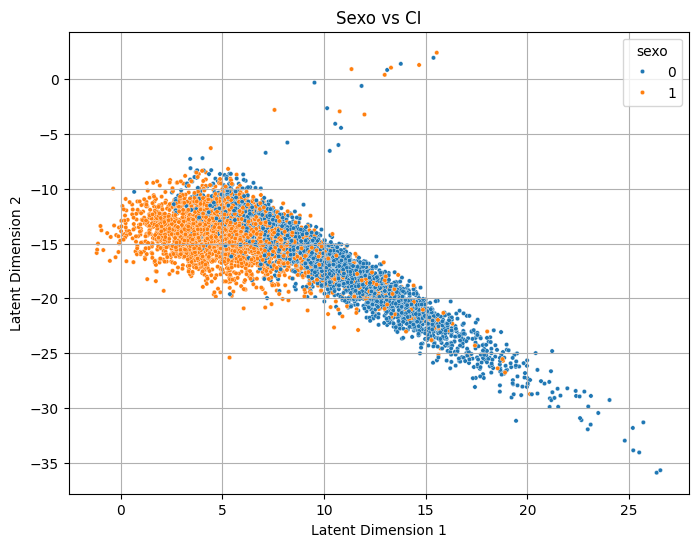

In [ ]:
# Plot the encoded data in 2D using Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Latent Dimension 1', y='Latent Dimension 2', data=exp_data, hue='sexo', s=10)
plt.title('Sexo vs CI')
plt.grid(True)
plt.show()

In [ ]:
# Plot the encoded data in 2D using Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Latent Dimension 1', y='Latent Dimension 2', data=exp_data, hue='sexo', s=10)
plt.title('Sexo vs CI')
plt.grid(True)
plt.show()

### Correlations

##### Cognitive

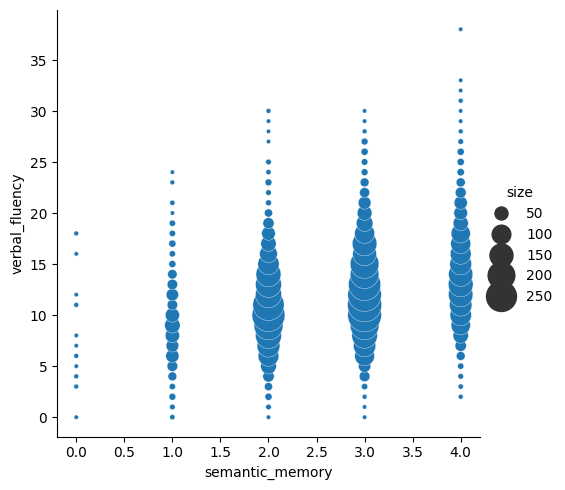

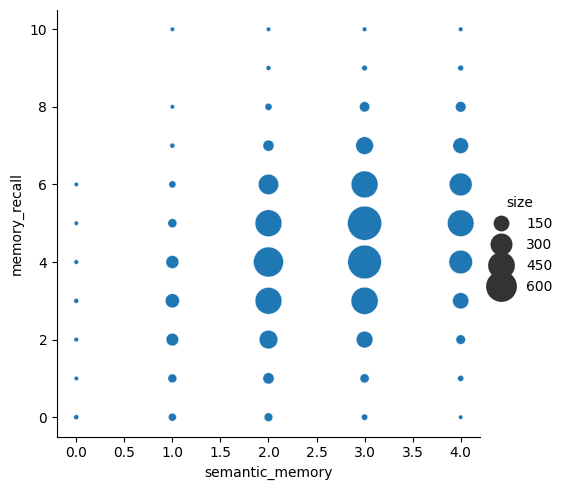

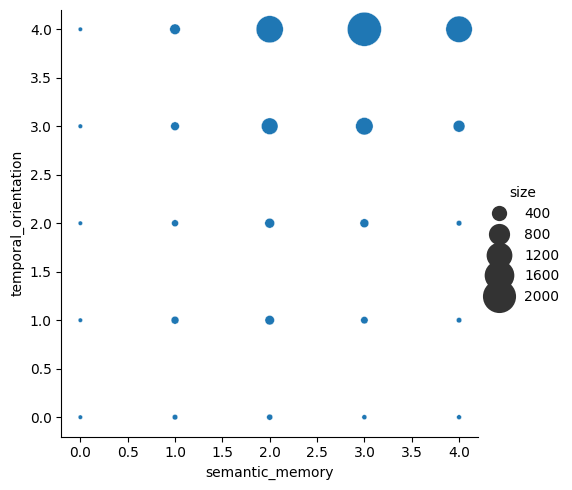

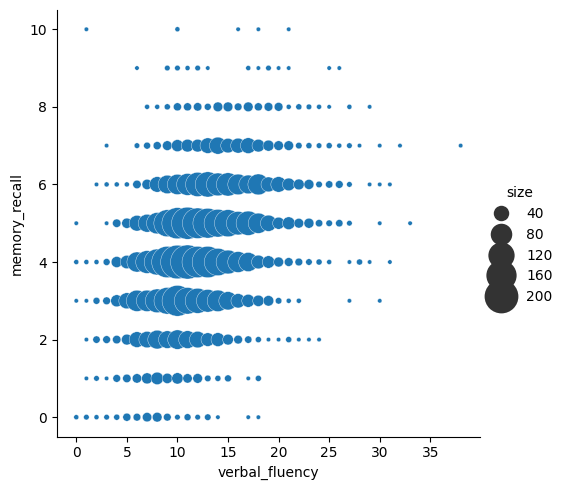

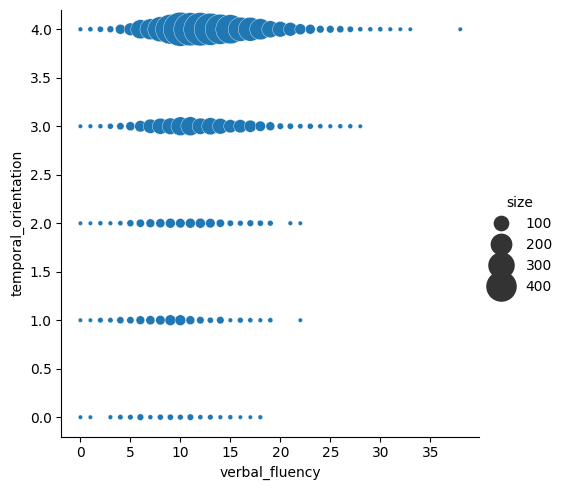

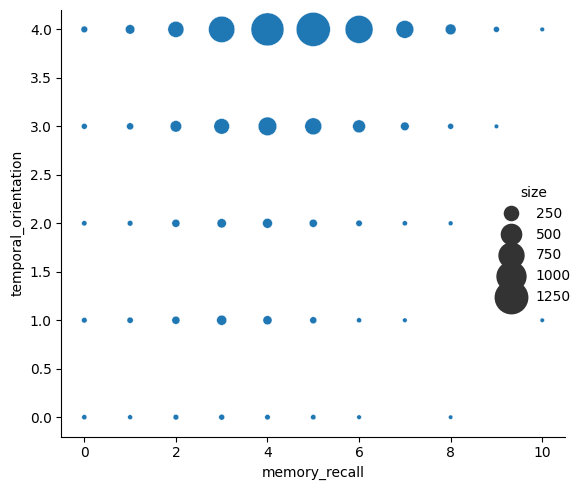

In [ ]:
from itertools import combinations
combinations_2by2 = list(combinations(ci_map['cognitive'], 2))
for i, combination in enumerate(combinations_2by2):
    size_corr = df_pca.groupby([combination[0], combination[1]]).size()
    size_corr.name = 'size'
    size_corr = size_corr.reset_index()
    sns.relplot(data=size_corr, x=combination[0], y=combination[1], size="size", sizes=(10, 600))
    # axs[i].set_title(f"Scatter Plot of {combination[0]} vs {combination[1]}")

plt.tight_layout()
plt.show()

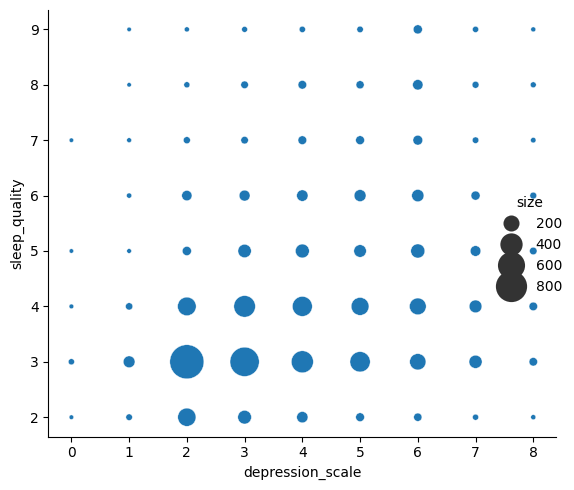

In [ ]:
from itertools import combinations
combinations_2by2 = list(combinations(ci_map['psychologicao'], 2))
for i, combination in enumerate(combinations_2by2):
    size_corr = df_pca.groupby([combination[0], combination[1]]).size()
    size_corr.name = 'size'
    size_corr = size_corr.reset_index()
    sns.relplot(data=size_corr, x=combination[0], y=combination[1], size="size", sizes=(10, 600))
    # axs[i].set_title(f"Scatter Plot of {combination[0]} vs {combination[1]}")

plt.tight_layout()
plt.show()